# Import Packages and Data

In [48]:
# Data from https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
bikes_df = pd.read_csv("BikeCounter.csv")

## Explore Data

In [50]:
bikes_df.head()

,Date,Total,East,West
0,8/1/2022 0:00,23.0,7.0,16.0
1,8/1/2022 1:00,12.0,5.0,7.0
2,8/1/2022 2:00,3.0,0.0,3.0
3,8/1/2022 3:00,5.0,2.0,3.0
4,8/1/2022 4:00,10.0,2.0,8.0


In [51]:
bikes_df.isna().sum()

Date      0
Total    14
East     14
West     14
dtype: int64

In [52]:
bikes_df.describe()

,Total,East,West
count,91210.000000,91210.000000,91210.000000
mean,105.603859,47.193882,58.409977
std,133.270779,60.779588,82.619206
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,58.000000,26.000000,30.000000
75%,142.000000,65.000000,75.000000
max,1097.000000,698.000000,850.000000


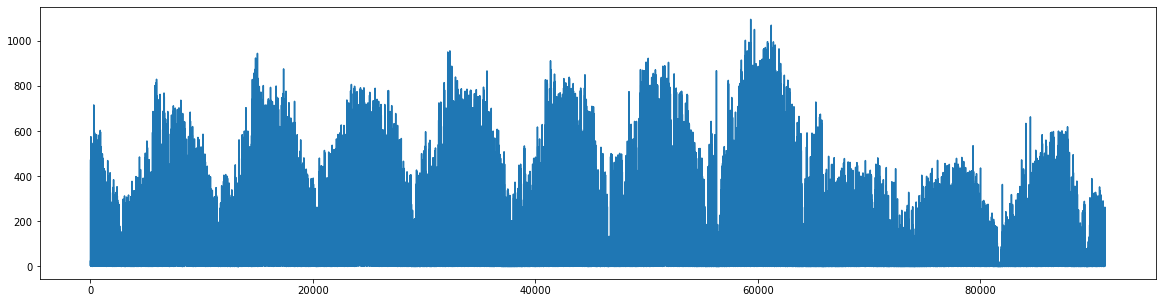

In [53]:
bikes_df['Total'].plot(figsize=(20,5))
plt.show()

## Create Timeseries Object

In [54]:
bikes_df['Date'] = pd.to_datetime(bikes_df['Date'])

In [55]:
bikes_df.set_index('Date',inplace=True)

In [56]:
bikes_df.head()

,Total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [57]:
bikes_df = bikes_df.asfreq('h')

In [58]:
bikes_df.isna().sum()

Total    14
East     14
West     14
dtype: int64

In [59]:
bikes_df.isna().sum()/len(bikes_df)

Total    0.000153
East     0.000153
West     0.000153
dtype: float64

In [60]:
bikes_df = bikes_df.fillna(method="ffill")
bikes_df.isna().sum()

Total    0
East     0
West     0
dtype: int64

In [61]:
bikes_df = bikes_df['Total']

## Plot Trends

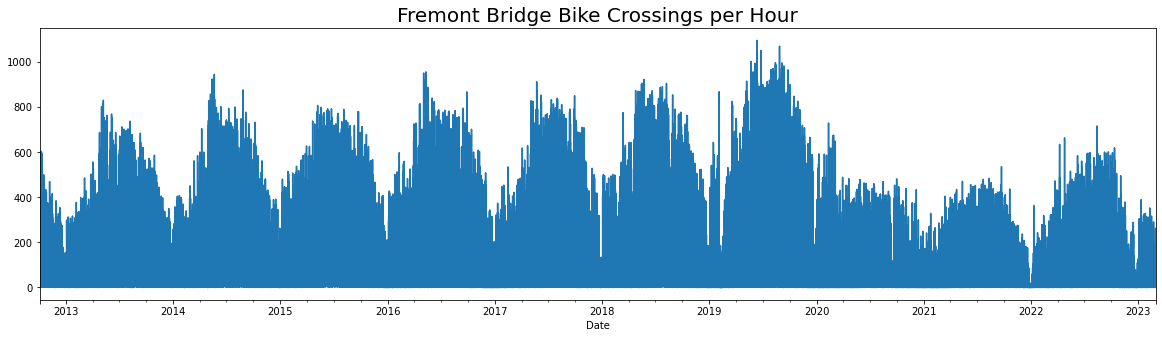

In [62]:
bikes_df.plot(figsize=(20,5))
plt.title("Fremont Bridge Bike Crossings per Hour", size = 20)
plt.show()

## Split Data

In [63]:
size = int(len(bikes_df)*0.8)
bikes_train = bikes_df.iloc[:size]
bikes_test = bikes_df.iloc[size:]

In [64]:
bikes_train.tail()

Date
2021-01-29 14:00:00    126.0
2021-01-29 15:00:00    161.0
2021-01-29 16:00:00    160.0
2021-01-29 17:00:00    122.0
2021-01-29 18:00:00     82.0
Freq: H, Name: Total, dtype: float64

In [65]:
bikes_test.head()

Date
2021-01-29 19:00:00    23.0
2021-01-29 20:00:00    18.0
2021-01-29 21:00:00    21.0
2021-01-29 22:00:00     8.0
2021-01-29 23:00:00     9.0
Freq: H, Name: Total, dtype: float64

## Export Data

In [66]:
bikes_train.to_csv("BikeCounter - Train.csv")
bikes_test.to_csv("BikeCounter - Test.csv")
bikes_df.to_csv("BikeCounter - Clean.csv")